# CSE 5243 - Introduction to Data Mining
## Homework 4: Clustering
- Semester: Fall 2022
- Instructor: John Paparrizos / Tom Bihari
- Section:Wednesday/Friday 11:10 AM
- Student Name: Yoojin Jeong
- Student.#: jeong.358
***

**Instructions and Helpful Hints:**
- Consider putting all of your "discussion" text in markdown cells, not inline with code. That gives you more control over formatting. Markdown cheat sheet: https://www.markdownguide.org/cheat-sheet
- Explain what you are doing, and why.  Explain what you found out or learned.
- *Make sure you run your entire workbook before handing it in, so the output cells are populated.*
- Follow the Section structure as much as possible - put your content where it is requested, so we can find your answers.
- If you have questions on expectations or need clarification or guidance, please ask.  Post to Teams if it is a general question, so everyone benefits.
***

# Introduction

### Objectives:

In this lab, you will perform clustering on three datasets.  Your will choose suitable clustering algorithms, evaluate them on the datasets, and compare their performance.

The objectives of this assignment are:
1.	Understand how to select and evaluate suitable off-the-shelf clustering algorithms based on the characteristics of a dataset and the outcomes you need.
2.	Understand how to tune and evaluate a clustering algorithm to achieve good performance.

### Datasets:

- The file **small_Xydf.csv** is a two-dimensional dataset with 200 records.  It contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm below.

- The file **large1_Xydf.csv** is a two-dimensional dataset with 3000 records.  It contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm below.

- The file **large2_Xydf.csv** is another two-dimensional dataset with 3000 records, and characteristics different from the “large1” dataset.  It contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm below.

### Approach:

This homework makes use of the Clustering Algorithms offered by the SciKitLearn Library.  Study the information at https://scikit-learn.org/stable/modules/clustering.html.  Follow the guidance in the individual sections below.

### Collaboration:

For this assignment, you should work as an individual. You may informally discuss ideas with classmates, to get advice on general Python usage, etc., but your work should be your own.  Please make use of Microsoft Teams!

### What you need to turn in:

1.	Code

-	For this homework, the code is the Jupyter Notebook.  Use the provided Jupyter Notebook template, and fill in the appropriate information.
-	This homework requires you to use clustering algorithms in the SciKitLearn library.  You also may use common Python libraries for I/O, data manipulation, data visualization, etc. (e.g., NumPy, Pandas, MatPlotLib,…).  You may not use library operations that perform, in effect, the entire “core” computations for this homework. (e.g., If you happen to find a single function on the web that does essentially *all* of a major portion of the homework, you may not use it.)  When in doubt, ask the grader or instructor.
-	The code must be written by you, and any significant code snips you found on the Internet and used to understand how to do your coding for the core functionality must be attributed.  (You do not need to attribute basic functionality – matrix operations, IO, etc.)
-	The code must be commented sufficiently to allow a reader to understand the algorithm without reading the actual Python, step by step.
-	When in doubt, ask the grader or instructor.

2.	Written Report
-	For this homework, the report is the Jupyter Notebook.  The report should be well-written.  Please proof-read and remove spelling and grammar errors and typos.
-	The report should discuss your analysis and observations. Key points and findings must be written in a style suitable for consumption by non-experts.  Present charts and graphs to support your observations. If you performed any data processing, cleaning, etc., please discuss it within the report.

### Grading:

1.	Overall readability and organization of your report (10%) - Is it well organized and does the presentation flow in a logical manner; are there many grammar and spelling mistakes; do the charts/graphs relate to the text, etc.
2.	Evaluation of the K-means Clustering Algorithm on the Small Dataset (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
3.	Evaluation of the K-means Clustering Algorithm on the Large1 Dataset (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
4.	Evaluation of the K-means Clustering Algorithm on the Large2 Dataset (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
5.	Evaluation of the Second Clustering Algorithm on the Large2 Dataset (15%) – Is your choice of algorithm and your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
6.	Evaluation of the Third Clustering Algorithm on the Large2 Dataset (15%) – Is your choice of algorithm and your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
7.	Comparison of the Three Clustering Algorithms (10%) - Is the comparison sound?  Did you choose a specific clustering algorithm as best and explain why?
8.	Conclusions (5%) – Did you document your overall insights? 

### How to turn in your work on Carmen:

**Please follow these instructions exactly** - it helps the grading process.  If you have questions, please ask.  Submit to Carmen any code that you used to process and analyze this data. You do not need to include the input data.  All the related files (code and/or report) except for the data should be archived in a **zip file (with no folder trees inside)** and submitted via Carmen.  The submitted file should be less than 5MB.  Use this naming convention: **HomeworkN_Surname_DotNumber.zip**

### References and Acknowledgements:

1.	https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster
2.	https://scikit-learn.org/stable/modules/clustering.html
3.	https://docs.python.org/3/library/time.html
4.	https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html
5.	https://gist.github.com/siolag161/dc6e42b64e1bde1f263b (using Hungarian Algorithm to match cluster labels - this is just an example)
6.	https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html (note that this is **mean** squared error)
***

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
***

We have to evaluate clustering algorithms on the given datasets applying what we have learned in the class. K-means, hierarchical, and density-based are clustering algorithms that we learned from the lecture. By applying different types of clustering algorithms in the given datasets, we will see the difference between algorithms and we will be able to find the algorithm with best performance.

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split 

sm = pd.read_csv("small_Xydf.csv")
lg1 = pd.read_csv("large1_Xydf.csv")
lg2 = pd.read_csv("large2_Xydf.csv")

***
# Section: 1 - Evaluate the **K-Means** Algorithm on the **Small** Dataset
***

***
## Section: 1.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

In [677]:
def wss_calculator(data, clus_num):
    wss = 0
    
    for i in range(clus_num):
        clus = data.loc[(data['y'] == i)]
        
        for i, row in clus.iterrows():
            wss += (row['X0'] - clus['X0'].mean())**2 + (row['X1'] - clus['X1'].mean())**2
            
    return wss
            
        
clus_num = 3
print('wss: ', wss_calculator(sm, clus_num))

wss:  1506.5321871253207


In [678]:
def bss_calculator(data, clus_num):
    bss = 0
    
    for i in range(clus_num):
        clus = data.loc[(data['y'] == i)]
        
        bss += 3*((sm['X0'].mean() - clus['X0'].mean())**2 + (sm['X1'].mean() - clus['X1'].mean())**2)
        
    return bss
            
        
clus_num = 3
print('bss: ', bss_calculator(sm, clus_num))

bss:  344.05411347356596


In [679]:
# Total SSE
clus_num = 3
wss = wss_calculator(sm, clus_num)
bss = bss_calculator(sm, clus_num)
total = wss+bss
print('Total sse:', total)

Total sse: 1850.5863005988867


***
## Section: 1.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run, compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
***

I defined a function of k-means algorithm. Parameters are data and the number of clusters(K). I created a for loop to fit the data into the Kmeans algorithm for each K values(2, 3, 4). Also, calculated wss and bss for each loop and then printed out wss, bss, and the total sse.

In [683]:
def kmeans(data, clus_num):
    X = data[['X0', 'X1']]
    wss_list = []
    bss_list = []
    pred_list = []
    start_time = time.time()
    
    for i in clus_num:
        km = KMeans(n_clusters=i)
        km.fit(X)
        
        centroids = km.cluster_centers_
        pred_clus = km.predict(X)
        pred_X = pd.concat([X, pd.DataFrame(pred_clus)], axis=1)
        pred_X.columns = ['X0', 'X1', 'y']
        
        pred_wss = wss_calculator(pred_X, i)
        pred_bss = bss_calculator(pred_X, i)
        wss_list.append(pred_wss)
        bss_list.append(pred_bss)
        pred_list.append(pred_X)
        
    print('running time: ', time.time() - start_time)
    print()
        
    for wss, bss, i in zip(wss_list, bss_list, clus_num):
        print('K =', i)
        print('wss = ', wss)
        print('bss = ', bss)
        print('total sse =', wss+bss)
        print()
    
    return pred_list
        

clus_num = range(2,5)
sm_pred = kmeans(sm, clus_num)
print(sm_pred)

running time:  0.18076801300048828

K = 2
wss =  2222.1849614332123
bss =  258.96181520031377
total sse = 2481.146776633526

K = 3
wss =  1368.7518425244439
bss =  355.6387387174693
total sse = 1724.3905812419132

K = 4
wss =  1157.6371594792347
bss =  451.93585746699245
total sse = 1609.5730169462272

[            X0        X1  y
0    -8.725226 -9.914383  1
1   -12.362349 -5.284858  1
2    -8.179872 -6.274891  1
3    -9.532723 -2.588246  1
4    -3.395447 -7.024462  1
..         ...       ... ..
195  -9.729616 -1.549239  1
196  -0.633700  3.810304  0
197  -3.002052  4.381161  0
198  -9.138660 -5.167345  1
199   0.143622  5.411479  0

[200 rows x 3 columns],             X0        X1  y
0    -8.725226 -9.914383  2
1   -12.362349 -5.284858  0
2    -8.179872 -6.274891  2
3    -9.532723 -2.588246  0
4    -3.395447 -7.024462  2
..         ...       ... ..
195  -9.729616 -1.549239  0
196  -0.633700  3.810304  1
197  -3.002052  4.381161  1
198  -9.138660 -5.167345  0
199   0.143622  5.411479  

***
## Section: 1.3 - For the K=3 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.  (Or alternatively, create two side by side scatterplots).
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report).  Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

In [684]:
from scipy.optimize import linear_sum_assignment

In [686]:
np.random.seed(0)

t = sm_pred[1]['y']
w = sm['y']

W, T = np.meshgrid(w, t)
cost_matrix = abs(T-W)

cm = confusion_matrix(w, t)
row_ind, col_ind = linear_sum_assignment(cm.max() - cm)

In [687]:
print(row_ind)
print(col_ind)

[0 1 2]
[1 0 2]


     Unnamed: 0         X0        X1  y
0             0  -8.725226 -9.914383  2
1             1 -12.362349 -5.284858  1
2             2  -8.179872 -6.274891  2
3             3  -9.532723 -2.588246  1
4             4  -3.395447 -7.024462  2
..          ...        ...       ... ..
195         195  -9.729616 -1.549239  1
196         196  -0.633700  3.810304  0
197         197  -3.002052  4.381161  0
198         198  -9.138660 -5.167345  1
199         199   0.143622  5.411479  0

[200 rows x 4 columns]
            X0        X1   y
0    -8.725226 -9.914383 -97
1   -12.362349 -5.284858   1
2    -8.179872 -6.274891 -97
3    -9.532723 -2.588246   1
4    -3.395447 -7.024462 -97
..         ...       ...  ..
195  -9.729616 -1.549239   1
196  -0.633700  3.810304   0
197  -3.002052  4.381161   0
198  -9.138660 -5.167345   1
199   0.143622  5.411479   0

[200 rows x 3 columns]


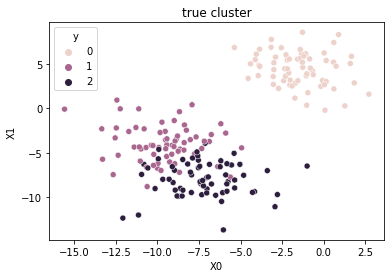

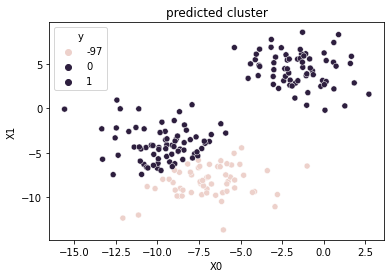

In [708]:
pred_copy = sm_pred[1]
for true_y, pred_y in zip(row_ind, col_ind):
    pred_copy.loc[pred_copy["y"] == pred_y, 'y'] = true_y + 99
    
pred_copy['y'] = pred_copy['y'].subtract(99)
print(sm)
print(pred_copy)
true_data = sm.loc[(sm['y'] == true_y)]

sns.scatterplot(data=sm, x="X0", y="X1", hue=sm['y'])
plt.title("true cluster")
plt.show()

sns.scatterplot(data=pred_copy, x="X0", y="X1", hue=pred_copy['y'])
plt.title("predicted cluster")
plt.show()

In [691]:
# confusion matrix

cm = confusion_matrix(sm['y'], pred_copy['y'])
print(cm)
print(classification_report(sm['y'], pred_copy['y']))

[[67  0  0]
 [ 0 62  5]
 [ 0 11 55]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.85      0.93      0.89        67
           2       0.92      0.83      0.87        66

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



***
## Section: 1.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

I could observe how total sum of squared error decreases as the number of cluster increases.
Among K being 2, 3, and 4, K being 4 gives a best performance with lower sum of squared errors.
Moreover, the accuracy between the actual dataset and the predicted dataset was 92% which is pretty high.
I also observed how small dataset can be clustered in 3 groups by looking at the graphs. In the true cluster graph, the data was scattered around the whole graph. However in the K-means graph, the size and density of each cluster looks similar.

***
# Section: 2 - Evaluate the **K-Means** Algorithm on the **Large1** Dataset
***

***
## Section: 2.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

In [692]:
print(lg1['y'].value_counts())
# values of y: 0,1,2,3,4,5,6,7

7    375
6    375
4    375
3    375
1    375
5    375
2    375
0    375
Name: y, dtype: int64


In [693]:
clus_num = 7
print('wss: ', wss_calculator(lg1, clus_num))

wss:  5265.68470693173


In [694]:
clus_num = 7
print('bss: ', bss_calculator(lg1, clus_num))

bss:  917.4987350987552


In [695]:
# Total SSE
clus_num = 7
wss = wss_calculator(lg1, clus_num)
bss = bss_calculator(lg1, clus_num)
total = wss+bss
print('Total sse:', total)

Total sse: 6183.183442030485


***
## Section: 2.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=6, 8, 10.
- For each run, compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
***

In [696]:
clus_num = [6,8,10]
lg1_pred = kmeans(lg1, clus_num)
lg1_pred

running time:  1.4824810028076172

K = 6
wss =  8332.61143098119
bss =  824.7787553082503
total sse = 9157.39018628944

K = 8
wss =  5225.55412383386
bss =  1056.7387756190044
total sse = 6282.292899452865

K = 10
wss =  4645.426105190323
bss =  1555.5903815383704
total sse = 6201.016486728693



[            X0        X1  y
 0    -9.726992  2.721249  2
 1    -5.996252  7.593801  3
 2    -9.952717  2.473725  2
 3    -3.845438  2.406487  4
 4    -6.735778 -1.920447  5
 ...        ...       ... ..
 2995 -3.011239  4.074445  0
 2996 -1.832417  0.997683  4
 2997 -3.878350  7.829988  3
 2998 -9.542672  4.500955  2
 2999 -2.097592  0.482558  4
 
 [3000 rows x 3 columns],
             X0        X1  y
 0    -9.726992  2.721249  3
 1    -5.996252  7.593801  5
 2    -9.952717  2.473725  3
 3    -3.845438  2.406487  0
 4    -6.735778 -1.920447  7
 ...        ...       ... ..
 2995 -3.011239  4.074445  2
 2996 -1.832417  0.997683  0
 2997 -3.878350  7.829988  5
 2998 -9.542672  4.500955  3
 2999 -2.097592  0.482558  0
 
 [3000 rows x 3 columns],
             X0        X1  y
 0    -9.726992  2.721249  4
 1    -5.996252  7.593801  8
 2    -9.952717  2.473725  4
 3    -3.845438  2.406487  7
 4    -6.735778 -1.920447  1
 ...        ...       ... ..
 2995 -3.011239  4.074445  7
 2996 -1.832417 

***
## Section: 2.3 - For the K=8 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.  (Or alternatively, create two side by side scatterplots).
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report).  Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

In [697]:
np.random.seed(0)

t = lg1_pred[1]['y']
w = lg1['y']

W, T = np.meshgrid(w, t)
cost_matrix = abs(T-W)

cm = confusion_matrix(w, t)
row_ind, col_ind = linear_sum_assignment(cm.max() - cm)

      Unnamed: 0        X0        X1  y
0              0 -9.726992  2.721249  7
1              1 -5.996252  7.593801  6
2              2 -9.952717  2.473725  7
3              3 -3.845438  2.406487  4
4              4 -6.735778 -1.920447  3
...          ...       ...       ... ..
2995        2995 -3.011239  4.074445  5
2996        2996 -1.832417  0.997683  4
2997        2997 -3.878350  7.829988  6
2998        2998 -9.542672  4.500955  7
2999        2999 -2.097592  0.482558  4

[3000 rows x 4 columns]
            X0        X1   y
0    -9.726992  2.721249 -96
1    -5.996252  7.593801 -94
2    -9.952717  2.473725 -96
3    -3.845438  2.406487 -95
4    -6.735778 -1.920447 -92
...        ...       ...  ..
2995 -3.011239  4.074445   0
2996 -1.832417  0.997683 -95
2997 -3.878350  7.829988 -94
2998 -9.542672  4.500955 -96
2999 -2.097592  0.482558 -95

[3000 rows x 3 columns]


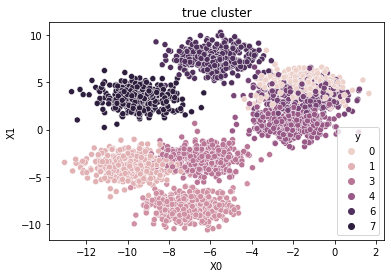

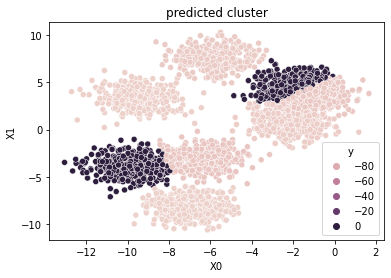

In [707]:
pred_copy = lg1_pred[1]
for true_y, pred_y in zip(row_ind, col_ind):
    pred_copy.loc[pred_copy["y"] == pred_y, 'y'] = true_y + 99
    
pred_copy['y'] = pred_copy['y'].subtract(99)
print(lg1)
print(pred_copy)
true_data = lg1.loc[(lg1['y'] == true_y)]

sns.scatterplot(data=lg1, x="X0", y="X1", hue=lg1['y'])
plt.title("true cluster")
plt.show()

sns.scatterplot(data=pred_copy, x="X0", y="X1", hue=pred_copy['y'])
plt.title("predicted cluster")
plt.show()

In [699]:
# confusion matrix

cm = confusion_matrix(lg1['y'], pred_copy['y'])
print(cm)
print(classification_report(lg1['y'], pred_copy['y']))

[[230   0   0   0  10 133   2   0]
 [  0 363   2  10   0   0   0   0]
 [  0   2 371   2   0   0   0   0]
 [  0  12   0 362   0   0   0   1]
 [  5   0   0   0 341  29   0   0]
 [158   0   0   0  22 194   1   0]
 [  4   0   0   0   0   0 370   1]
 [  0   0   0   0   0   0   0 375]]
              precision    recall  f1-score   support

           0       0.58      0.61      0.60       375
           1       0.96      0.97      0.97       375
           2       0.99      0.99      0.99       375
           3       0.97      0.97      0.97       375
           4       0.91      0.91      0.91       375
           5       0.54      0.52      0.53       375
           6       0.99      0.99      0.99       375
           7       0.99      1.00      1.00       375

    accuracy                           0.87      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.87      0.87      3000



***
## Section: 2.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

Using K-means clustering algorithm on this large dataset seems to show a bad performance compared to the small dataset from section 1. The total sum of squared error decreases if the number of clusters increases. However, the total sse still seems to be high even with the bigger number of clusters. The accuracy of the predicted data was 87%, which is lower than the accuracy of k-means clustering used in small dataset. 

***
# Section: 3 - Evaluate the **K-Means** Algorithm on the **Large2** Dataset
***

***
## Section: 3.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

In [258]:
print(lg2['y'].value_counts())
# values of y: 0,1

1    1500
0    1500
Name: y, dtype: int64


In [259]:
clus_num = 2
print('wss: ', wss_calculator(lg2, clus_num))

wss:  1917.7276232889415


In [260]:
clus_num = 2
print('bss: ', bss_calculator(lg2, clus_num))

bss:  309.93583810248845


In [494]:
# Total SSE
clus_num = 2
wss = wss_calculator(lg2, clus_num)
bss = bss_calculator(lg2, clus_num)
total = wss+bss
print('Total sse:', total)

Total sse: 2227.66346139143


***
## Section: 3.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run, compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
***

In [703]:
clus_num = [2,3,4]
lg2_pred = kmeans(lg2, clus_num)
lg2_pred

running time:  1.3933398723602295

K = 2
wss =  1310.2119182951485
bss =  310.45493017673834
total sse = 1620.6668484718869

K = 3
wss =  880.5393297134351
bss =  472.29721451476485
total sse = 1352.8365442282

K = 4
wss =  592.6606692081073
bss =  628.3807016341837
total sse = 1221.041370842291



[            X0        X1  y
 0     0.422710 -0.544382  1
 1     0.750712 -0.316916  1
 2    -1.052781  0.483709  0
 3     0.035695  0.479169  0
 4    -0.482704  0.358094  0
 ...        ...       ... ..
 2995  1.676255 -0.202250  1
 2996 -0.232984  1.014637  0
 2997 -0.577190  0.799030  0
 2998  0.980917  0.489829  1
 2999 -0.624245  0.926909  0
 
 [3000 rows x 3 columns],
             X0        X1  y
 0     0.422710 -0.544382  2
 1     0.750712 -0.316916  2
 2    -1.052781  0.483709  1
 3     0.035695  0.479169  2
 4    -0.482704  0.358094  1
 ...        ...       ... ..
 2995  1.676255 -0.202250  0
 2996 -0.232984  1.014637  1
 2997 -0.577190  0.799030  1
 2998  0.980917  0.489829  2
 2999 -0.624245  0.926909  1
 
 [3000 rows x 3 columns],
             X0        X1  y
 0     0.422710 -0.544382  0
 1     0.750712 -0.316916  0
 2    -1.052781  0.483709  1
 3     0.035695  0.479169  3
 4    -0.482704  0.358094  1
 ...        ...       ... ..
 2995  1.676255 -0.202250  2
 2996 -0.232984 

***
## Section: 3.3 - For the K=2 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.  (Or alternatively, create two side by side scatterplots).
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report).  Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

In [803]:
np.random.seed(0)

t = lg2_pred[0]['y']
w = lg2['y']

W, T = np.meshgrid(w, t)
cost_matrix = abs(T-W)

cm = confusion_matrix(w, t)
row_ind, col_ind = linear_sum_assignment(cm.max() - cm)

      Unnamed: 0        X0        X1  y
0              0  0.422710 -0.544382  1
1              1  0.750712 -0.316916  1
2              2 -1.052781  0.483709  0
3              3  0.035695  0.479169  1
4              4 -0.482704  0.358094  0
...          ...       ...       ... ..
2995        2995  1.676255 -0.202250  1
2996        2996 -0.232984  1.014637  0
2997        2997 -0.577190  0.799030  0
2998        2998  0.980917  0.489829  0
2999        2999 -0.624245  0.926909  0

[3000 rows x 4 columns]
            X0        X1  y
0     0.422710 -0.544382  1
1     0.750712 -0.316916  1
2    -1.052781  0.483709  0
3     0.035695  0.479169  0
4    -0.482704  0.358094  0
...        ...       ... ..
2995  1.676255 -0.202250  1
2996 -0.232984  1.014637  0
2997 -0.577190  0.799030  0
2998  0.980917  0.489829  1
2999 -0.624245  0.926909  0

[3000 rows x 3 columns]


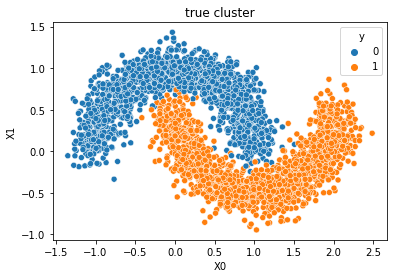

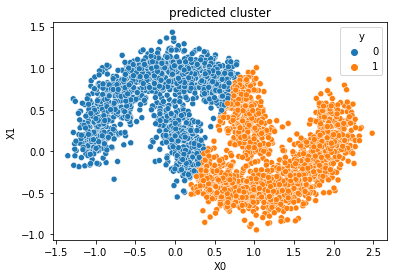

In [804]:
pred_copy = lg2_pred[0]
for true_y, pred_y in zip(row_ind, col_ind):
    pred_copy.loc[pred_copy["y"] == pred_y, 'y'] = true_y + 99
    
pred_copy['y'] = pred_copy['y'].subtract(99)
print(lg2)
print(pred_copy)
true_data = lg2.loc[(lg2['y'] == true_y)]

sns.scatterplot(data=lg2, x="X0", y="X1", hue=lg2['y'])
plt.title("true cluster")
plt.show()

sns.scatterplot(data=pred_copy, x="X0", y="X1", hue=pred_copy['y'])
plt.title("predicted cluster")
plt.show()

In [713]:
# confusion matrix

cm = confusion_matrix(lg2['y'], pred_copy['y'])
print(cm)
print(classification_report(lg2['y'], pred_copy['y']))

[[1118  382]
 [ 359 1141]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      1500
           1       0.75      0.76      0.75      1500

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000



***
## Section: 3.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

For this type of non-globular shaped data, we can see that K-means clustering has a limitation. Having 2 clusters for this non-globular shaped data can cause a problem because clusters don't really capture the semantics of the dataset. The accuracy between the original dataset and the predicted dataset is 75% which is pretty low. Solution for this limitation is to use more clusters.

***
# Section: 4 - Evaluate a **Second** Clustering Algorithm on the **Large2** Dataset
***

## Hierarchical Clustering Algorithm

***
## Section: 4.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
- See the SciKitLearn references.
***

I chose to use hierarchical clustering algorithm to see if this performs better than k-means algorithm. I chose to evaluate this algorithm because this is one of the algorithms we learned in the class.

In [789]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

***
## Section: 4.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For Each Run:
1. Compute the within-cluster WSS, the between-cluster BSS, and the Total SSE (WSS+BSS), and compute the running time.
2. Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.  (Or alternatively, create two side by side scatterplots).
3. Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report).  Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

In [857]:
clus_num = 2
print('wss: ', wss_calculator(lg2, clus_num))
print('bss: ', bss_calculator(lg2, clus_num))
wss = wss_calculator(lg2, clus_num)
bss = bss_calculator(lg2, clus_num)
total = wss+bss
print('Total sse:', total)

wss:  1917.7276232889415
bss:  309.93583810248845
Total sse: 2227.66346139143


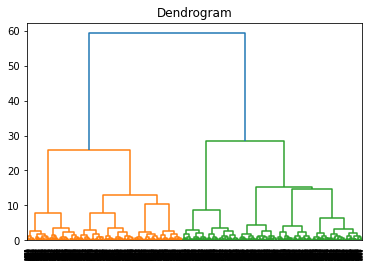

In [745]:
plt.title('Dendrogram')
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

In [843]:
X = lg2[['X0', 'X1']]

ac = AgglomerativeClustering(n_clusters=2)
fit = ac.fit_predict(X)

# linear sum
np.random.seed(0)
t = fit
w = lg2['y']
W, T = np.meshgrid(w, t)
cost_matrix = abs(T-W)
cm = confusion_matrix(w, t)
row_ind, col_ind = linear_sum_assignment(cm.max() - cm)


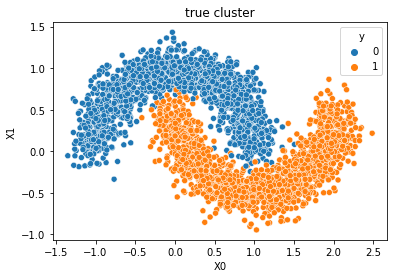

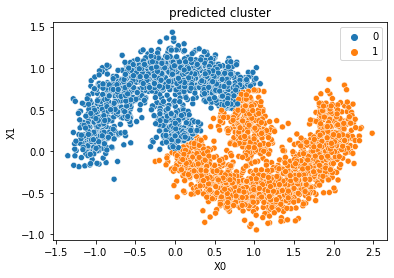

In [842]:
for true_y, pred_y in zip(row_ind, col_ind):
    fit[fit == pred_y] = true_y + 99
    
fit = np.subtract(fit,99)
true_data = lg2.loc[(lg2['y'] == true_y)]

sns.scatterplot(data=lg2, x="X0", y="X1", hue=lg2['y'])
plt.title("true cluster")
plt.show()

sns.scatterplot(data=lg2, x="X0", y="X1", hue=fit)
plt.title("predicted cluster")
plt.show()

In [840]:
cm = confusion_matrix(lg2['y'], fit)
print(cm)
print(classification_report(lg2['y'], fit))

[[1191  309]
 [ 204 1296]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1500
           1       0.81      0.86      0.83      1500

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000



***
## Section: 4.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

Evaluating a different clustering algorithm(hierarchical) in a same dataset(large2) showed a difference in accuracy. When evaluating k-means algorithm in the dataset, the accuracy was 75%. However, the accuracy of the hierarchical(agglomerative) was 83%, which is higher than k-means altorithm. 

***
# Section: 5 - Evaluate a **Third** Clustering Algorithm on the **Large2** Dataset
***

## Gaussian Mixture

***
## Section: 5.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
- See the SciKitLearn references.
***

I chose to evaluate gaussian mixture clustering algorithm to the dataset because we haven't learned this in the class. I wanted to explore how it performs differently on the same dataset compared to the other clustering algorithms.

In [865]:
from sklearn.mixture import GaussianMixture

***
## Section: 5.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For Each Run:
1. Compute the within-cluster WSS, the between-cluster BSS, and the Total SSE (WSS+BSS), and compute the running time.
2. Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.  (Or alternatively, create two side by side scatterplots).
3. Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report).  Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

In [856]:
clus_num = 2
print('wss: ', wss_calculator(lg2, clus_num))
print('bss: ', bss_calculator(lg2, clus_num))
wss = wss_calculator(lg2, clus_num)
bss = bss_calculator(lg2, clus_num)
total = wss + bss
print('Total sse:', total)

wss:  1917.7276232889415
bss:  309.93583810248845
Total sse: 2227.66346139143


In [866]:
X = lg2[['X0', 'X1']]
gmm = GaussianMixture(n_components=2, random_state=0).fit(X)
labels = gmm.predict(X)

np.random.seed(0)
t = labels
w = lg2['y']
W, T = np.meshgrid(w, t)
cost_matrix = abs(T-W)
cm = confusion_matrix(w, t)
row_ind, col_ind = linear_sum_assignment(cm.max() - cm)

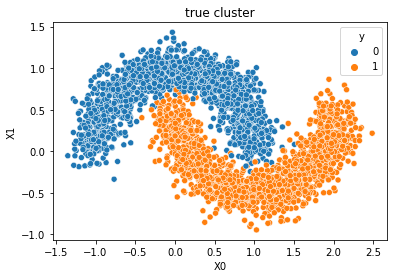

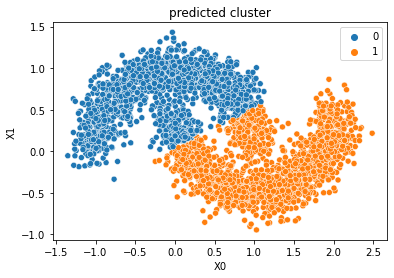

In [862]:
for true_y, pred_y in zip(row_ind, col_ind):
    labels[labels == pred_y] = true_y + 99
    
labels = np.subtract(labels, 99)
true_data = lg2.loc[(lg2['y'] == true_y)]

sns.scatterplot(data=lg2, x="X0", y="X1", hue=lg2['y'])
plt.title("true cluster")
plt.show()

sns.scatterplot(data=lg2, x="X0", y="X1", hue=labels)
plt.title("predicted cluster")
plt.show()

In [863]:
cm = confusion_matrix(lg2['y'], labels)
print(cm)
print(classification_report(lg2['y'], labels))

[[1273  227]
 [ 200 1300]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1500
           1       0.85      0.87      0.86      1500

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



***
## Section: 5.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

The accuracy of this Gaussian mixture model is higher than the K-means and hierarchical clustering models. Accuracy of the gaussian mixture model is 86%, which is higher than 75%, 83%. The graph doesn't really have a difference compared to the one using hierarchical clustering. However, it shows a better performance. 

***
# Section: 6 - Comparison of the Three Clustering Algorithms on the **Large2** Dataset
***

***
## Section: 6.1 - Compare Their Performance
- What was their relative performance (quality and timing), and their performance versus the true clustering?
- What characteristics of the data might impact the clustering algorithms' performance?
***

|         |K-means|Hierarchical|Gaussian|
|-----------|-----------|-----------|-----------|
|Accuracy|75%|83%|86%|

Comparing the accuracy of the predicted model compared to the true clustering, K-means shows the lowest performance in accuracy and Gaussian Mixture shows the highest accuracy. It was very interesting to see how the results of evaluating different clustering algorithms on the same dataset. I think the shape of the dataset and how the data is scattered in the graph impacted the clustering algorithms' performance. The Large2 dataset, which is a non-globular shaped dataset, seems to fit the best in gaussian mixture model.

***
## Section: 6.2 - Choose a Best Clustering Algorithm
- Choose one of the three clustering algorithm as best and explain why.
***

Among three clustering algorithms, K-means, hierarchical, and gaussian mixture, it seems like gaussian mixture  performs the best on the Large2 dataset according to the accuracy. Since the accuracy of the gaussian mixture model is the highest, being 86%, I would say the best clustering algorithm is the gaussian mixture clustering algorithm.

***
# Section: 7 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

It was very interesting to see how K-means clustering algorithms can be evaluated in three different datasets. For K values that I have tried, the sum of squared errors were decreasing as the K value increases. I enjoyed evaluating the clustering algorithm into different datasets with different sizes and shapes. Moreover, I liked the part when evaluating different clustering algorithms on the same dataset. I could learn how each algorithm works in the same dataset and which one performs the best in the dataset like Large2.\
By working on this homework and studying more about clustering myself, I found out that there are many clustering algorithms. Beyond this homework, I want to explore new clustering algorithms and find out the difference between those. 

***
### END-OF-SUBMISSION
***